
Description: The number of features to consider when looking for the best split.
Impact: Controls the randomness of each tree. A lower value can reduce overfitting but may also reduce accuracy.
Typical Range: Values like 'auto', 'sqrt', 'log2', or a specific integer.
max_features must be in (0, n_features]

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, fbeta_score


df = pd.read_csv('GeneralDatensatz18-21ohneGeo-mitLockdown_mitCorona.csv', sep=';')

X=df[['UMONAT','USTUNDE','UWOCHENTAG','UART','USTRZUSTAND','BEZ','UTYP1','ULICHTVERH','IstRad','IstPKW','IstFuss','IstKrad','IstGkfz','IstSonstige', 'LOCKDOWN', 'COVID']]
#für tödliche Unfälle

# KFold-Konfiguration
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#für tödliche und schwere vs. leichte Unfälle  -> 1 ist schwer oder tödlich, 0 ist leicht
y = df['UKATEGORIE'].isin([1, 2]).astype(int)





In [2]:
# erstmal alle Parameter einzeln mit class weight 9 und fbeta mit beta = 2
beta = 2
fbeta_scorer= make_scorer(fbeta_score, beta=beta)
class_weight_optimiert = {0:1, 1: 9}


max_index = 0
max_score = 0
number_trees = []
results = []



for i in 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 'auto', 'sqrt', 'log2':
    rf_clas = RandomForestClassifier(max_features = i, random_state=42, class_weight=class_weight_optimiert)
    result_fbeta = cross_val_score(rf_clas, X, y, cv=kf, scoring=fbeta_scorer)
    if result_fbeta.mean() > max_score: 
        max_index = i
        max_score = result_fbeta.mean()
        print(f"bester score bei max_feature = {i}")
    number_trees.append(i)
    results.append(result_fbeta.mean())
    print(f"Fbeta-score mit max-feature = {i}:", result_fbeta.mean())





bester score bei max_feature = 1
Fbeta-score mit max-feature = 1: 0.06091002953188866
bester score bei max_feature = 2
Fbeta-score mit max-feature = 2: 0.06882845444231767
bester score bei max_feature = 3
Fbeta-score mit max-feature = 3: 0.0724257679042761
bester score bei max_feature = 4
Fbeta-score mit max-feature = 4: 0.07395594724045755
Fbeta-score mit max-feature = 5: 0.07342211178284173
bester score bei max_feature = 6
Fbeta-score mit max-feature = 6: 0.07535707153188696
bester score bei max_feature = 7
Fbeta-score mit max-feature = 7: 0.07699202241978817
Fbeta-score mit max-feature = 8: 0.07529898572700848
bester score bei max_feature = 9
Fbeta-score mit max-feature = 9: 0.0782744969124614
bester score bei max_feature = 10
Fbeta-score mit max-feature = 10: 0.07915377239006911
Fbeta-score mit max-feature = 11: 0.0771393464649111
bester score bei max_feature = 12
Fbeta-score mit max-feature = 12: 0.08088045859139413
Fbeta-score mit max-feature = 13: 0.07931747314701829
bester scor

/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/miniconda3/envs/py3.10-cuda12.1-tf2.16/lib/python3.10/site-package

Fbeta-score mit max-feature = auto: 0.07395594724045755
Fbeta-score mit max-feature = sqrt: 0.07395594724045755
Fbeta-score mit max-feature = log2: 0.07395594724045755


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


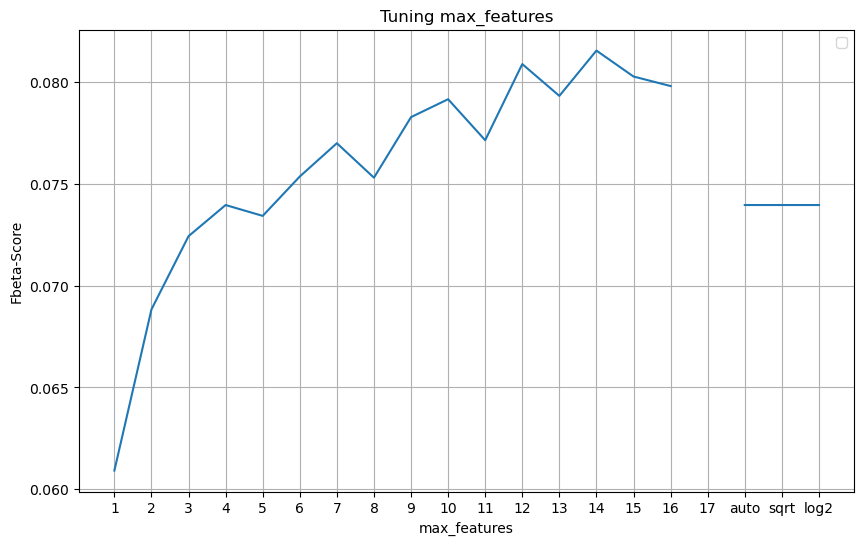

In [3]:
from matplotlib import pyplot as plt

# F1-Scores plotten
plt.figure(figsize=(10, 6))
plt.plot(number_trees, results)

plt.title('Tuning max_features')
plt.xlabel('max_features')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()